In [ ]:
# Credit card Frad dectection

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#                               Read the data set

In [3]:
creditcard_df = pd.read_csv('creditcard.csv')

In [4]:
credit_card_df = creditcard_df.sample(n=50000, random_state=1)

#  See the data content and head lines

In [5]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


#                         To see the shape of the data

In [6]:
credit_card_df.shape

(50000, 31)

#                     Check if any missing data from the data set

In [7]:
credit_card_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#                        Another way fo checking missing data

In [8]:
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#                                 For more information of the data set

In [9]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,94568.237120,0.009375,-0.006388,0.007932,0.005389,-0.013584,0.002138,-0.012014,-0.000626,0.009799,...,0.003204,0.002161,-0.001578,-0.002866,-0.000264,0.002758,0.000194,-0.003018,88.835696,0.001560
std,47644.749181,1.944718,1.655675,1.496093,1.415263,1.373212,1.326671,1.207344,1.165860,1.094200,...,0.730002,0.724390,0.642273,0.602641,0.519139,0.482751,0.394789,0.300881,255.854804,0.039466
min,0.000000,-46.855047,-63.344698,-31.813586,-5.266509,-42.147898,-23.496714,-26.548144,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.836627,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53707.250000,-0.912235,-0.606529,-0.887455,-0.842316,-0.707377,-0.765034,-0.562158,-0.206860,-0.634059,...,-0.227375,-0.541636,-0.162504,-0.357463,-0.317833,-0.325672,-0.071048,-0.053269,5.900000,0.000000
50%,84531.000000,0.034600,0.058804,0.181288,-0.009739,-0.071339,-0.270534,0.029527,0.023536,-0.041871,...,-0.030649,0.008707,-0.011542,0.038580,0.016487,-0.049156,0.001380,0.010736,22.255000,0.000000
75%,139321.000000,1.319965,0.801407,1.033060,0.748400,0.603720,0.401818,0.558740,0.325839,0.609796,...,0.186562,0.530342,0.148253,0.432802,0.350429,0.246083,0.090069,0.076237,78.000000,0.000000
max,172784.000000,2.411499,17.418649,4.069865,16.715537,34.099309,22.529298,36.677268,19.587773,9.272376,...,22.588989,6.090514,18.946734,3.962197,5.541598,3.155327,11.135740,15.373170,19656.530000,1.000000


#        Whole data can be seen by plotting, when you cannot see them by data, So that can see the variables

<AxesSubplot:>

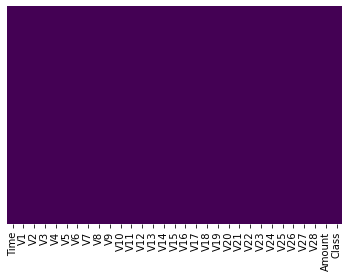

In [10]:
sns.heatmap(credit_card_df.isnull(),yticklabels= False,cbar=False,cmap='viridis')

In [11]:
#

Unnecessary

#     To see the attempts of fraud from the data set

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

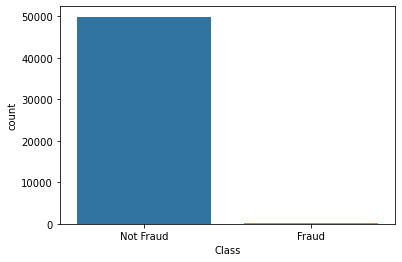

In [12]:
target = sns.countplot(x='Class', data=credit_card_df)
target.set_xticklabels(['Not Fraud','Fraud'])

#You should add comments explaining what you see. For example here you should say that data is very unbalanced.

From the above plot, it is clearly very unblanced data. It means fradulant and non-fradulant are very unbalnced eacth other. If this is the case then requires special care when training and splitting the data.


# Count the attempts of fraud from the data set based on the Class

In [13]:
credit_card_df['Class'].value_counts()

0    49922
1       78
Name: Class, dtype: int64

#             To see any other avriables

In [14]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 169876 to 203074
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  float64
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float

This is another way of seeing that the data does not contain any missing values. 

#      Check and find the data into train and test models - Logistic Regression

In [15]:
# As we have seen data is very unbalanced. Let have look wtih few methods how do we approach and out come.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = credit_card_df.drop('Class',axis=1)

y = credit_card_df['Class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lgrmodel = LogisticRegression()

In [21]:
lgrmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
predictions = lgrmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Confusion Matrix: 
 [[14968     7]
 [   13    12]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14975
           1       0.63      0.48      0.55        25

    accuracy                           1.00     15000
   macro avg       0.82      0.74      0.77     15000
weighted avg       1.00      1.00      1.00     15000



In [25]:
# Using Resampling Techniques - Oversampling minority class


In [149]:
from sklearn.utils import resample

In [150]:
# Separte the features and target
X = credit_card_df.drop('Class',axis=1) 

y = credit_card_df['Class']

In [151]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [152]:
# concatenate the training data to the orginal data using Pandas
X = pd.concat([X_train,y_train],axis=1)

In [153]:
# separate the minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [154]:
# up sample the minority classes
fraud_upsampled = resample(fraud, replace=True,n_samples=len(not_fraud),random_state=30)

In [155]:
# Add majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [156]:
# Check and how many of them now
upsampled.Class.value_counts()

1    34942
0    34942
Name: Class, dtype: int64

In [157]:
# From the above, now the data is balanced each other. Time to put this into logistic regressoion and perform.
X_train = upsampled.drop('Class',axis=1)
y_train = upsampled.Class

In [158]:
upsampled = LogisticRegression(solver='liblinear')

In [159]:
upsampled.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [160]:
upsampled_pred = upsampled.predict(X_test)

In [161]:
from sklearn.metrics import classification_report, confusion_matrix

In [162]:
print('Confusion Matrix: \n', confusion_matrix(y_test, upsampled_pred))
print('Classification Report: \n', classification_report(y_test, upsampled_pred))

Confusion Matrix: 
 [[14282   698]
 [    1    19]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     14980
           1       0.03      0.95      0.05        20

    accuracy                           0.95     15000
   macro avg       0.51      0.95      0.51     15000
weighted avg       1.00      0.95      0.97     15000



In [40]:
# There is very good improvement by oversampling technique compared to basic logistic regression model. Where, Recall and f1-score 
# recaching above 90%. Let's check with Undersampling the main data. Can see any improvements

In [41]:
from sklearn.utils import resample

In [42]:
# Separte the features and target
X = credit_card_df.drop('Class',axis=1) 

y = credit_card_df['Class']

In [43]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [44]:
# concatenate the training data to the orginal data using Pandas
X = pd.concat([X_train,y_train],axis=1)

In [45]:
# separate the minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [46]:
# downsample the majority classes
not_fraud_downsampled = resample(not_fraud, replace=True,n_samples=len(fraud),random_state=30)

In [47]:
# Add minority and downsampled majority
downsampled = pd.concat([fraud, not_fraud_downsampled])

In [48]:
# Check and how many of them now
downsampled.Class.value_counts()

1    58
0    58
Name: Class, dtype: int64

In [49]:
# From the above, now the data is balanced each other. Time to put this into logistic regressoion and perform.
X_train = downsampled.drop('Class',axis=1)
y_train = downsampled.Class

In [50]:
downsampled = LogisticRegression(solver='liblinear')

In [51]:
downsampled.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [52]:
downsampled_pred = downsampled.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print('Confusion Matrix: \n', confusion_matrix(y_test, downsampled_pred))
print('Classification Report: \n', classification_report(y_test, downsampled_pred))

Confusion Matrix: 
 [[14066   914]
 [    1    19]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     14980
           1       0.02      0.95      0.04        20

    accuracy                           0.94     15000
   macro avg       0.51      0.94      0.50     15000
weighted avg       1.00      0.94      0.97     15000



In [55]:
# It is seen that Undersampling is not better than Oversampling because, it takes less data points compared to Oversampling.
# hence Oversampling will gives us better results. Lets check other techinique which is called synthetic samples. It is 
# called SMOTE. It uses a nearest neighbors alogrithm tp genrate new and synthetic data to train the model.

In [56]:
#pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
# Separte the features and target
X = credit_card_df.drop('Class',axis=1) 

y = credit_card_df['Class']

In [59]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [60]:
smt = SMOTE(random_state=27)

In [61]:
X_train, y_train = smt.fit_sample(X_train, y_train)

In [62]:
smote = LogisticRegression(solver='liblinear')

In [63]:
smote.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [64]:
smote_pred = smote.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print('Confusion Matrix: \n', confusion_matrix(y_test, smote_pred))
print('Classification Report: \n', classification_report(y_test, smote_pred))

Confusion Matrix: 
 [[14549   431]
 [    2    18]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     14980
           1       0.04      0.90      0.08        20

    accuracy                           0.97     15000
   macro avg       0.52      0.94      0.53     15000
weighted avg       1.00      0.97      0.98     15000



In [67]:
# SMOTE obiviously increased score for recall and f1-score. Much better than Undersampling and are close to 
# oversampling technique. 

In [96]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 169876 to 203074
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  float64
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float

#           Random Forests model

In [120]:
#from sklearn.model_selection import train_test_split

In [121]:
#X = credit_card_df.drop('Class',axis=1)

#y = credit_card_df['Class']

In [122]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [123]:
# random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [124]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [125]:
# Re-create the model
Random_class = RandomForestClassifier(n_estimators=30)

In [126]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [127]:
# evaluate model
scores = cross_val_score(Random_class, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [128]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.896


#     K-nearest neighbours model

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
KScaler = StandardScaler()

In [131]:
KScaler.fit(credit_card_df.drop('Class',axis=1))

StandardScaler()

In [132]:
Scaled_feat = KScaler.transform(credit_card_df.drop('Class',axis=1))

In [133]:
credit_card_df_feat = pd.DataFrame(Scaled_feat,columns = credit_card_df.columns[:-1])

In [134]:
credit_card_df_feat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.531832,-0.319374,-0.461036,-0.105403,-0.162703,1.487157,-1.524150,0.252213,-0.448081,0.318656,...,-0.262078,-0.107415,0.059879,0.595263,0.043651,-4.277169,-0.422383,0.167959,0.745143,-0.340219
1,-0.340613,-0.423745,0.800652,0.883298,0.015463,-0.197558,-0.494568,0.276283,0.374492,-0.652626,...,-0.015194,-0.180581,-0.511782,0.143612,0.670410,-0.502317,0.161291,0.410942,0.207639,-0.339476
2,-0.255775,-0.168442,0.679491,0.642969,-0.093581,0.424663,-0.402984,0.594920,-0.055188,-0.432347,...,0.268750,-0.422752,-1.072450,-0.190430,-0.817777,-0.034450,0.246342,0.630358,0.317515,-0.343736
3,-1.319177,-0.687842,0.618948,1.181418,-1.116116,-0.075817,-0.346639,0.574723,-0.026603,0.341872,...,0.413707,-0.306878,-0.581425,-0.369970,0.021294,0.449005,1.680839,0.249765,-0.004172,-0.284757
4,-0.286398,0.651688,0.376592,-0.391654,0.617407,0.054828,-1.111168,0.319470,-0.245811,-0.086165,...,-0.142262,-0.223790,-0.597149,-0.117024,0.434049,1.064147,0.762187,-0.087258,0.148654,-0.344244


In [164]:
from sklearn.model_selection import train_test_split

In [166]:
X = credit_card_df_feat

y = credit_card_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn = KNeighborsClassifier(n_neighbors=5)

In [172]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [173]:
X_test.shape

(15000, 30)

In [174]:
knn_pred = knn.predict(X_test.sample(n=15000, random_state=1))

In [175]:
from sklearn.metrics import classification_report,confusion_matrix

In [177]:
print('Confusion Matrix: \n', confusion_matrix(y_test.sample(n=15000, random_state=1), knn_pred))
print('Classification Report: \n', classification_report(y_test.sample(n=15000, random_state=1), knn_pred))

Confusion Matrix: 
 [[14973     2]
 [   11    14]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14975
           1       0.88      0.56      0.68        25

    accuracy                           1.00     15000
   macro avg       0.94      0.78      0.84     15000
weighted avg       1.00      1.00      1.00     15000



#  To choose correct K value using elbow method

In [181]:
error_rate=[]

# Can increase range for better K
# Choose the best K from the plot
for i in range (1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_i_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_i_pred!=y_test))

Text(0, 0.5, 'Error Rate')

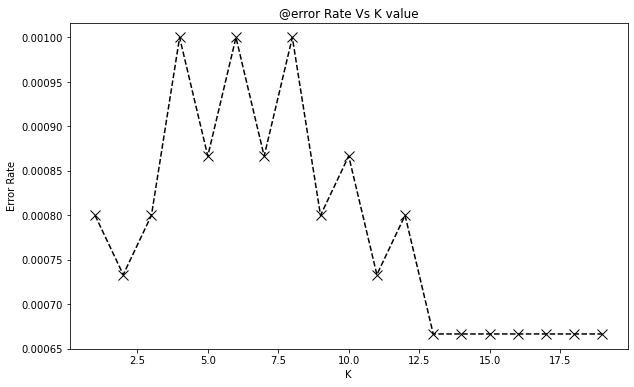

In [182]:
#To help us to choose the best k by plotting error rate as below. Look for K where it is consistence from the graph 
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='black',linestyle='--',marker='x',markerfacecolor='red',markersize=10)
plt.title('@error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [234]:
# From the above plot at k=11 is best to choose as an average either side of data set (between lowest and highest)
knn = KNeighborsClassifier(n_neighbors=11)

In [235]:
# Again fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [237]:
# Predict the model
knn_pred = knn.predict(X_test)

In [238]:
# Score summary
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_pred))
print('Classification Report: \n', classification_report(y_test, knn_pred))

Confusion Matrix: 
 [[14973     2]
 [    9    16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14975
           1       0.89      0.64      0.74        25

    accuracy                           1.00     15000
   macro avg       0.94      0.82      0.87     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:
# With Elbow method score improves much better compared standard K Neighbors.

#   Support Vector Machines model

In [201]:
from sklearn.svm import SVC

In [202]:
svc_model = SVC()

In [203]:
svc_model.fit(X_train,y_train)

SVC()

In [204]:
svc_pred = svc_model.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix

In [206]:
print('Confusion Matrix: \n', confusion_matrix(y_test, svc_pred))
print('Classification Report: \n', classification_report(y_test, svc_pred))

Confusion Matrix: 
 [[14975     0]
 [   17     8]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14975
           1       1.00      0.32      0.48        25

    accuracy                           1.00     15000
   macro avg       1.00      0.66      0.74     15000
weighted avg       1.00      1.00      1.00     15000



#      Optimisation using GridSearchCV

In [208]:
from sklearn.model_selection import GridSearchCV

In [229]:
# Create a dictionary and fill some parameter for C and gamma on SVC()
param_grid = {'C':[0.1,1,10,100],'gamma':[1.0,0.1,0.01,0.001]}

In [231]:
# Create the CVe object and fit the model
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1.0 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=0.1, gamma=1.0, total=  12.0s
[CV] C=0.1, gamma=1.0 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


[CV] ................................. C=0.1, gamma=1.0, total=  12.2s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=  11.7s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=  11.7s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=  11.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   4.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   4.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   4.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.2s
[CV] C=100, gamma=1.0 ................................................
[CV] ................................. C=100, gamma=1.0, total= 1.3min
[CV] C=100, gamma=1.0 ................................................
[CV] ................................. C=100, gamma=1.0, total= 1.2min
[CV] C=100, gamma=1.0 ................................................
[CV] ................................. C=100, gamma=1.0, total= 1.2min
[CV] C=100, gamma=1.0 ................................................
[CV] ................................. C=100, gamma=1.0, total= 1.2min
[CV] C=100, gamma=1.0 ................................................
[CV] ................................. C=100, gamma=1.0, total= 1.3min
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   6.5s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 21.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1.0, 0.1, 0.01, 0.001]},
             verbose=2)

In [232]:
#Predict the model
grid_pred = grid.predict(X_test)

In [233]:
# Explain the summary
print('Confusion Matrix: \n', confusion_matrix(y_test, grid_pred))
print('Classification Report: \n', classification_report(y_test, grid_pred))

Confusion Matrix: 
 [[14974     1]
 [   12    13]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14975
           1       0.93      0.52      0.67        25

    accuracy                           1.00     15000
   macro avg       0.96      0.76      0.83     15000
weighted avg       1.00      1.00      1.00     15000

